In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\\\Users\kimte\\git\\data-analytics-and-science\\exercises\\exercise 1 - loan prediction problem\\data\\train.csv')
df.shape
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Missing values identification

In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
df[df.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


# Target value identification and recoding

###  target Loan_Status

In [6]:
df["Loan_Status"].isnull().value_counts() 

False    614
Name: Loan_Status, dtype: int64

In [7]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
df["Loan_Status_int"] = df["Loan_Status"].astype('category').cat.codes

In [9]:
pd.crosstab(df["Loan_Status"],df["Loan_Status_int"])

Loan_Status_int,0,1
Loan_Status,,
N,192,0
Y,0,422


# Predictive variable identification

Opties om data in dummys om te zetten:

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

df["Gender"].astype('category').cat.codes

pd.get_dummies(df["Gender"])

## make list for predictive vars

In [10]:
x_selected = []
x_selected

[]

### Var Gender

In [11]:
df["Gender"].isnull().value_counts()

False    601
True      13
Name: Gender, dtype: int64

In [12]:
pd.crosstab(df["Loan_Status"], df["Gender"].isnull())\
,pd.crosstab(df["Loan_Status"], df["Gender"].isnull(),normalize="columns")

(Gender       False  True 
 Loan_Status              
 N              187      5
 Y              414      8, Gender          False     True 
 Loan_Status                    
 N            0.311148  0.384615
 Y            0.688852  0.615385)

In [13]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"], df["Gender"].isnull()))

(0.06914477852564363,
 0.7925860748104012,
 1,
 array([[187.93485342,   4.06514658],
        [413.06514658,   8.93485342]]))

In [14]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Loan_Status  Gender
N            Male      0.802139
             Female    0.197861
Y            Male      0.818841
             Female    0.181159
Name: Gender, dtype: float64

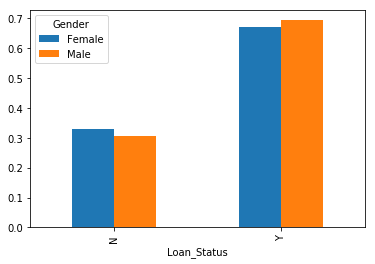

In [15]:
pd.crosstab(df["Loan_Status"], df["Gender"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Gender"].value_counts(normalize=True)

In [16]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"],df["Gender"]))

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569, 152.15141431],
        [ 77.15141431, 336.84858569]]))

### Var Married

In [17]:
df["Married"].isnull().value_counts()

False    611
True       3
Name: Married, dtype: int64

In [18]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Loan_Status  Married
N            Yes        0.588542
             No         0.411458
Y            Yes        0.680191
             No         0.319809
Name: Married, dtype: float64

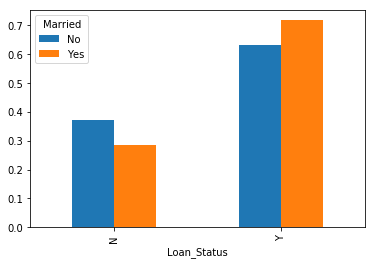

In [19]:
pd.crosstab(df["Loan_Status"], df["Married"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Married"].value_counts(normalize=True)

In [20]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"], df["Married"]))

(4.475019348315097,
 0.03439381301579988,
 1,
 array([[ 66.93289689, 125.06710311],
        [146.06710311, 272.93289689]]))

In [21]:
df = pd.concat([df, pd.get_dummies(df["Married"], prefix="Married", prefix_sep="_")], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Loan_Status_int      614 non-null int8
Married_No           614 non-null uint8
Married_Yes          614 non-null uint8
dtypes: float64(4), int64(1), int8(1), object(8), uint8(2)
memory usage: 64.2+ KB


In [22]:
x_selected += ["Married_No"]
x_selected += ["Married_Yes"]
x_selected

['Married_No', 'Married_Yes']

### var Dependents

In [23]:
df["Dependents"].isnull().value_counts() 

False    599
True      15
Name: Dependents, dtype: int64

In [24]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Loan_Status  Dependents
N            0             0.575269
             1             0.193548
             2             0.134409
             3+            0.096774
Y            0             0.576271
             2             0.184019
             1             0.159806
             3+            0.079903
Name: Dependents, dtype: float64

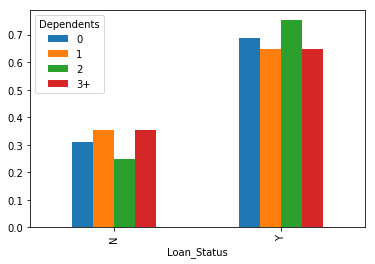

In [25]:
pd.crosstab(df["Loan_Status"], df["Dependents"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Dependents"].value_counts(normalize=True)

In [26]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"],df["Dependents"]))

(3.158339770698263,
 0.3678506740863211,
 3,
 array([[107.12854758,  31.67278798,  31.36227045,  15.83639399],
        [237.87145242,  70.32721202,  69.63772955,  35.16360601]]))

In [27]:
df = pd.concat([df, pd.get_dummies(df["Dependents"], prefix="Dependents", prefix_sep="_")], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Loan_Status_int      614 non-null int8
Married_No           614 non-null uint8
Married_Yes          614 non-null uint8
Dependents_0         614 non-null uint8
Dependents_1         614 non-null uint8
Dependents_2         614 non-null uint8
Dependents_3+        614 non-null uint8
dtypes: float64(4), int64(1), int8(1), object(8), uint8(6)
memory usage: 66.6+ K

In [28]:
x_selected += ["Dependents_0"]
x_selected += ["Dependents_1"]
x_selected += ["Dependents_2"]
x_selected += ["Dependents_3+"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+']

### var Education

In [29]:
df["Education"].isnull().value_counts() 

False    614
Name: Education, dtype: int64

In [30]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Loan_Status  Education   
N            Graduate        0.729167
             Not Graduate    0.270833
Y            Graduate        0.805687
             Not Graduate    0.194313
Name: Education, dtype: float64

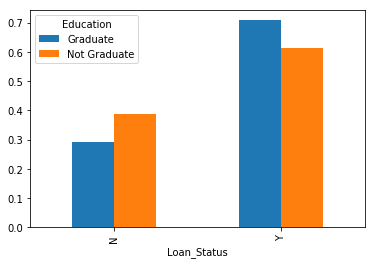

In [31]:
pd.crosstab(df["Loan_Status"], df["Education"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Education"].value_counts(normalize=True)

In [32]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"],df["Education"]))

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987,  41.90228013],
        [329.90228013,  92.09771987]]))

In [33]:
df = pd.concat([df, pd.get_dummies(df["Education"], prefix="Education", prefix_sep="_")], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
Loan_ID                   614 non-null object
Gender                    601 non-null object
Married                   611 non-null object
Dependents                599 non-null object
Education                 614 non-null object
Self_Employed             582 non-null object
ApplicantIncome           614 non-null int64
CoapplicantIncome         614 non-null float64
LoanAmount                592 non-null float64
Loan_Amount_Term          600 non-null float64
Credit_History            564 non-null float64
Property_Area             614 non-null object
Loan_Status               614 non-null object
Loan_Status_int           614 non-null int8
Married_No                614 non-null uint8
Married_Yes               614 non-null uint8
Dependents_0              614 non-null uint8
Dependents_1              614 non-null uint8
Dependents_2              614 non-null uint8
Dependents_3+            

In [34]:
x_selected += ["Education_Graduate"]
x_selected += ["Education_Not Graduate"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate']

### var Self_Employed

In [35]:
df["Self_Employed"].isnull().value_counts() 

False    582
True      32
Name: Self_Employed, dtype: int64

In [36]:
pd.crosstab(df["Loan_Status"], df["Self_Employed"].isnull())\
,pd.crosstab(df["Loan_Status"], df["Self_Employed"].isnull(),normalize="columns")

(Self_Employed  False  True 
 Loan_Status                
 N                183      9
 Y                399     23, Self_Employed     False    True 
 Loan_Status                     
 N              0.314433  0.28125
 Y              0.685567  0.71875)

In [37]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"], df["Self_Employed"].isnull()))

(0.039355234686307354,
 0.8427465608010392,
 1,
 array([[181.99348534,  10.00651466],
        [400.00651466,  21.99348534]]))

In [38]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Loan_Status  Self_Employed
N            No               0.857923
             Yes              0.142077
Y            No               0.859649
             Yes              0.140351
Name: Self_Employed, dtype: float64

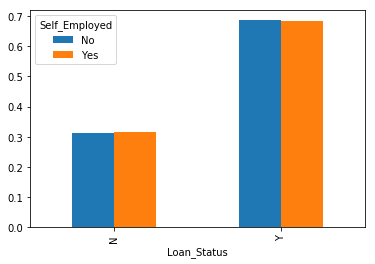

In [39]:
pd.crosstab(df["Loan_Status"], df["Self_Employed"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Self_Employed"].value_counts(normalize=True)

### var ApplicantIncome

In [40]:
df["ApplicantIncome"].isnull().value_counts() 

False    614
Name: ApplicantIncome, dtype: int64

In [41]:
df["ApplicantIncome"].min(), df["ApplicantIncome"].max(), df["ApplicantIncome"].mean(), df["ApplicantIncome"].median()

(150, 81000, 5403.459283387622, 3812.5)

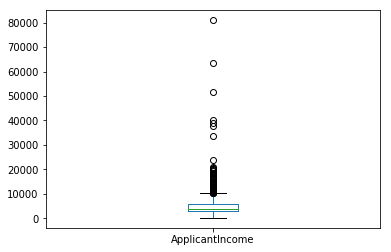

In [42]:
ax = df["ApplicantIncome"].plot.box()

Loan_Status
N    3833.5
Y    3812.5
Name: ApplicantIncome, dtype: float64

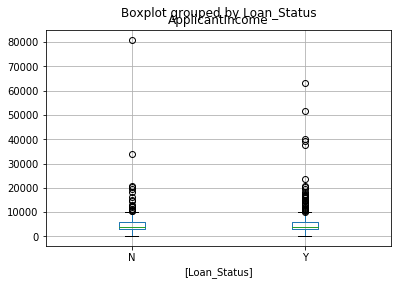

In [43]:
df[["ApplicantIncome","Loan_Status"]].boxplot(by=["Loan_Status"])
df.groupby("Loan_Status")["ApplicantIncome"].median()

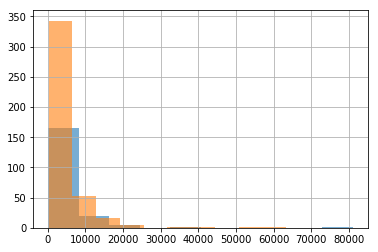

In [44]:
df['ApplicantIncome'][(df["Loan_Status"]=='N')].hist(alpha=0.6)
df['ApplicantIncome'][(df["Loan_Status"]=='Y')].hist(alpha=0.6)

In [45]:
import scipy.stats as scs
scs.ttest_rel(df["Loan_Status_int"],df["ApplicantIncome"])

Ttest_relResult(statistic=-21.9142988876132, pvalue=4.748130362747891e-79)

In [46]:
x_selected += ["ApplicantIncome"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'ApplicantIncome']

### var CoapplicantIncome

In [47]:
df["CoapplicantIncome"].isnull().value_counts() 

False    614
Name: CoapplicantIncome, dtype: int64

In [48]:
df["CoapplicantIncome"].min(), df["CoapplicantIncome"].max(), df["CoapplicantIncome"].mean(), df["CoapplicantIncome"].median()


(0.0, 41667.0, 1621.245798027101, 1188.5)

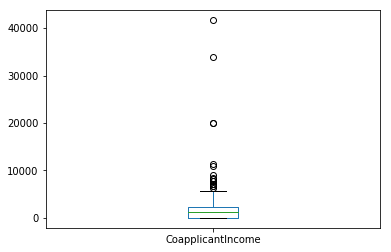

In [49]:
ax = df["CoapplicantIncome"].plot.box()

In [50]:
df["CoapplicantIncome"][df["CoapplicantIncome"]>0].shape

(341,)

In [51]:
df["CoapplicantIncome"][df["CoapplicantIncome"]>0].min(), df["CoapplicantIncome"][df["CoapplicantIncome"]>0].max(), df["CoapplicantIncome"][df["CoapplicantIncome"]>0].mean(), df["CoapplicantIncome"][df["CoapplicantIncome"]>0].median()


(16.12000084, 41667.0, 2919.1933137496776, 2166.0)

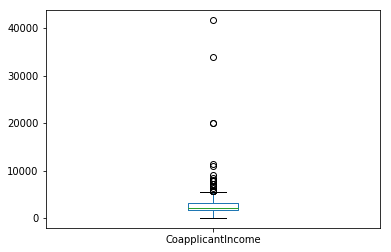

In [52]:
ax = df["CoapplicantIncome"][df["CoapplicantIncome"]>0].plot.box()

Loan_Status
N     268.0
Y    1239.5
Name: CoapplicantIncome, dtype: float64

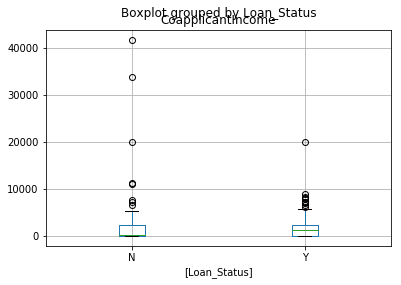

In [53]:
df[["CoapplicantIncome","Loan_Status"]].boxplot(by=["Loan_Status"])
df.groupby("Loan_Status")["CoapplicantIncome"].median()

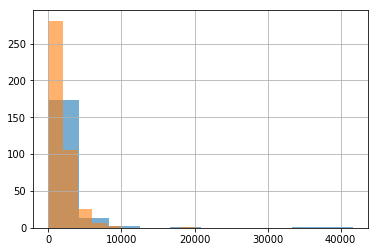

In [54]:
df['CoapplicantIncome'][(df["Loan_Status"]=='N')].hist(alpha=0.6)
df['CoapplicantIncome'][(df["Loan_Status"]=='Y')].hist(alpha=0.6)

In [55]:
import scipy.stats as scs
scs.ttest_rel(df["Loan_Status_int"],df["CoapplicantIncome"])

Ttest_relResult(statistic=-13.722512447102023, pvalue=1.4535599487434854e-37)

In [56]:
x_selected += ["CoapplicantIncome"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'ApplicantIncome',
 'CoapplicantIncome']

### var LoanAmount

In [57]:
df["LoanAmount"].isnull().value_counts() 

False    592
True      22
Name: LoanAmount, dtype: int64

In [58]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["LoanAmount"].isnull().value_counts() 

False    614
Name: LoanAmount, dtype: int64

In [59]:
df["LoanAmount"].min(), df["LoanAmount"].max(), df["LoanAmount"].mean(), df["LoanAmount"].median()


(9.0, 700.0, 146.41216216216213, 129.0)

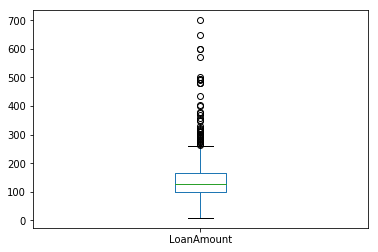

In [60]:
ax = df["LoanAmount"].plot.box()

Loan_Status
N    133.5
Y    128.0
Name: LoanAmount, dtype: float64

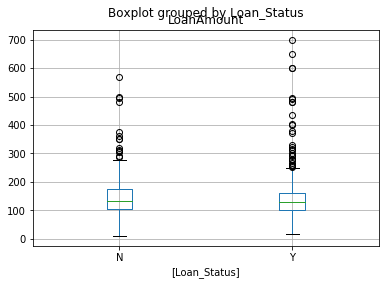

In [61]:
df[["LoanAmount","Loan_Status"]].boxplot(by=["Loan_Status"])
df.groupby("Loan_Status")["LoanAmount"].median()

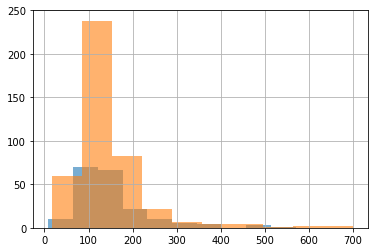

In [62]:
df['LoanAmount'][(df["Loan_Status"]=='N')].hist(alpha=0.6)
df['LoanAmount'][(df["Loan_Status"]=='Y')].hist(alpha=0.6)

In [63]:
import scipy.stats as scs
scs.ttest_rel(df["Loan_Status_int"],df["LoanAmount"])

Ttest_relResult(statistic=-42.95868482627563, pvalue=4.887381019239418e-187)

In [64]:
x_selected += ["LoanAmount"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount']

### Var Loan_Amount_Term

In [65]:
df["Loan_Amount_Term"].isnull().value_counts() 

False    600
True      14
Name: Loan_Amount_Term, dtype: int64

In [66]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["Loan_Amount_Term"].isnull().value_counts() 

False    614
Name: Loan_Amount_Term, dtype: int64

In [67]:
df["Loan_Amount_Term"].min(), df["Loan_Amount_Term"].max(), df["Loan_Amount_Term"].mean(), df["Loan_Amount_Term"].median()

(12.0, 480.0, 342.0, 360.0)

Loan_Status
N    360.0
Y    360.0
Name: Loan_Amount_Term, dtype: float64

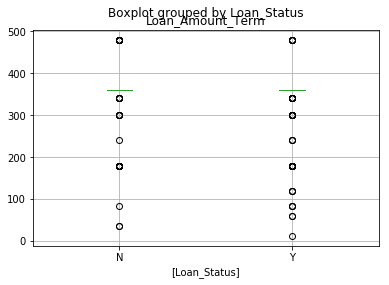

In [68]:
df[["Loan_Amount_Term","Loan_Status"]].boxplot(by=["Loan_Status"])
df.groupby("Loan_Status")["Loan_Amount_Term"].median()

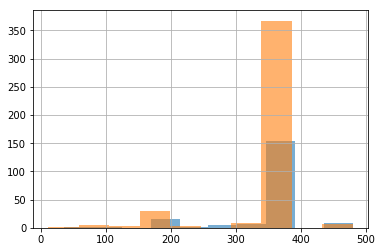

In [69]:
df['Loan_Amount_Term'][(df["Loan_Status"]=='N')].hist(alpha=0.6)
df['Loan_Amount_Term'][(df["Loan_Status"]=='Y')].hist(alpha=0.6)

In [70]:
import scipy.stats as scs
scs.ttest_rel(df["Loan_Amount_Term"],df["CoapplicantIncome"])

Ttest_relResult(statistic=-10.815655405977603, pvalue=4.509484864891342e-25)

### var Credit_History

In [71]:
df["Credit_History"].isnull().value_counts() 

False    564
True      50
Name: Credit_History, dtype: int64

In [72]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Loan_Status  Credit_History
N            1.0               0.541899
             0.0               0.458101
Y            1.0               0.981818
             0.0               0.018182
Name: Credit_History, dtype: float64

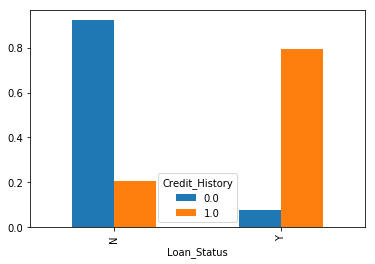

In [73]:
pd.crosstab(df["Loan_Status"], df["Credit_History"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Credit_History"].value_counts(normalize=True)

In [74]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"],df["Credit_History"]))

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539, 150.7535461],
        [ 60.7535461, 324.2464539]]))

In [75]:
df = pd.concat([df, pd.get_dummies(df["Credit_History"], prefix="Credit_History", prefix_sep="_")], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
Loan_ID                   614 non-null object
Gender                    601 non-null object
Married                   611 non-null object
Dependents                599 non-null object
Education                 614 non-null object
Self_Employed             582 non-null object
ApplicantIncome           614 non-null int64
CoapplicantIncome         614 non-null float64
LoanAmount                614 non-null float64
Loan_Amount_Term          614 non-null float64
Credit_History            564 non-null float64
Property_Area             614 non-null object
Loan_Status               614 non-null object
Loan_Status_int           614 non-null int8
Married_No                614 non-null uint8
Married_Yes               614 non-null uint8
Dependents_0              614 non-null uint8
Dependents_1              614 non-null uint8
Dependents_2              614 non-null uint8
Dependents_3+            

In [76]:
x_selected += ["Credit_History_0.0"]
x_selected += ["Credit_History_1.0"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History_0.0',
 'Credit_History_1.0']

### var Property_Area

In [77]:
df["Property_Area"].isnull().value_counts() 

False    614
Name: Property_Area, dtype: int64

In [78]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status  Property_Area
N            Rural            0.359375
             Urban            0.359375
             Semiurban        0.281250
Y            Semiurban        0.424171
             Urban            0.315166
             Rural            0.260664
Name: Property_Area, dtype: float64

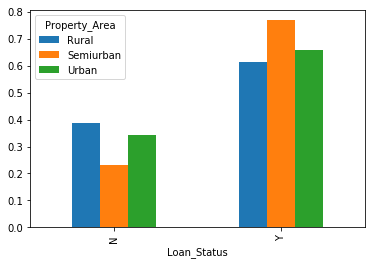

In [79]:
pd.crosstab(df["Loan_Status"], df["Property_Area"], normalize="columns").plot(kind='bar')
df.groupby("Loan_Status")["Property_Area"].value_counts(normalize=True)

In [80]:
import scipy.stats as scs
scs.chi2_contingency(pd.crosstab(df["Loan_Status"],df["Property_Area"]))

(12.297623130485677,
 0.0021360187811644915,
 2,
 array([[ 55.97394137,  72.85993485,  63.16612378],
        [123.02605863, 160.14006515, 138.83387622]]))

In [81]:
df = pd.concat([df, pd.get_dummies(df["Property_Area"], prefix="Property_Area", prefix_sep="_")], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 27 columns):
Loan_ID                    614 non-null object
Gender                     601 non-null object
Married                    611 non-null object
Dependents                 599 non-null object
Education                  614 non-null object
Self_Employed              582 non-null object
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             564 non-null float64
Property_Area              614 non-null object
Loan_Status                614 non-null object
Loan_Status_int            614 non-null int8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Depend

In [82]:
x_selected += ["Property_Area_Rural"]
x_selected += ["Property_Area_Semiurban"]
x_selected += ["Property_Area_Urban"]
x_selected

['Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History_0.0',
 'Credit_History_1.0',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

# Model bouwen

In [83]:
x_selected
x=df[x_selected]
y=df["Loan_Status_int"]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Credit_History_0.0         614 non-null uint8
Credit_History_1.0         614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(2), int64(1), uint8(13)
memory usage: 22.3 KB


In [92]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.453409
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        Loan_Status_int   No. Observations:                  614
Model:                          Logit   Df Residuals:                      599
Method:                           MLE   Df Model:                           14
Date:                Tue, 31 Jul 2018   Pseudo R-squ.:                  0.2702
Time:                        10:27:33   Log-Likelihood:                -278.39
converged:                      False   LL-Null:                       -381.45
                                        LLR p-value:                 3.102e-36
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Married_No                -15.3175   2410.087     -0.006      0.995   -4739.001    4708.366
Married_Yes               

C:\Users\kimte\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 6)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)
list = np.atleast_1d(rfe.support_)
x_features = x.loc[:,list]

[ True False False  True False False  True False False False False  True
  True False  True False]
[ 1  4  5  1  2  7  1  6 11 10  9  1  1  3  1  8]


In [97]:
x_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
Married_No                 614 non-null uint8
Dependents_1               614 non-null uint8
Education_Graduate         614 non-null uint8
Credit_History_0.0         614 non-null uint8
Credit_History_1.0         614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
dtypes: uint8(6)
memory usage: 3.7 KB


In [98]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x_features)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464067
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Loan_Status_int   No. Observations:                  614
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 Jul 2018   Pseudo R-squ.:                  0.2530
Time:                        10:28:08   Log-Likelihood:                -284.94
converged:                       True   LL-Null:                       -381.45
                                        LLR p-value:                 8.851e-40
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Married_No                 -0.4943      0.213     -2.317      0.020      -0.912   